In [10]:
#import libraries and modules required
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import dates as mpldates
import datetime as dt
import numpy as np

In [11]:
#filtering through the csv file for Nepal and India's covid data 
# and keeping only some of it (date, location, total cases, 
# new cases, new cases smoothed, new deaths smoothed)
df = pd.read_csv('covid_data.csv', index_col=0 )
df.set_index('date', inplace=True)
df = df.iloc[:,[1,2,3,4,7]]
df_ind = df.copy()[df['location'] == 'India'].fillna(0)
df_nep = df.copy()[df['location'] == 'Nepal'].fillna(0)

In [12]:
#converting string dates to datetime objects and cases to
#numpy arrays for proper formatting later
df_nep['date'] = pd.to_datetime(list(df_nep.index)) 
nep_date = list(df_nep['date'])
nep_new_cases = np.array(df_nep['new_cases_smoothed'])
df_ind['date'] = pd.to_datetime(list(df_ind.index)) 
ind_date = list(df_ind['date'])
ind_new_cases = np.array(df_ind['new_cases_smoothed'])

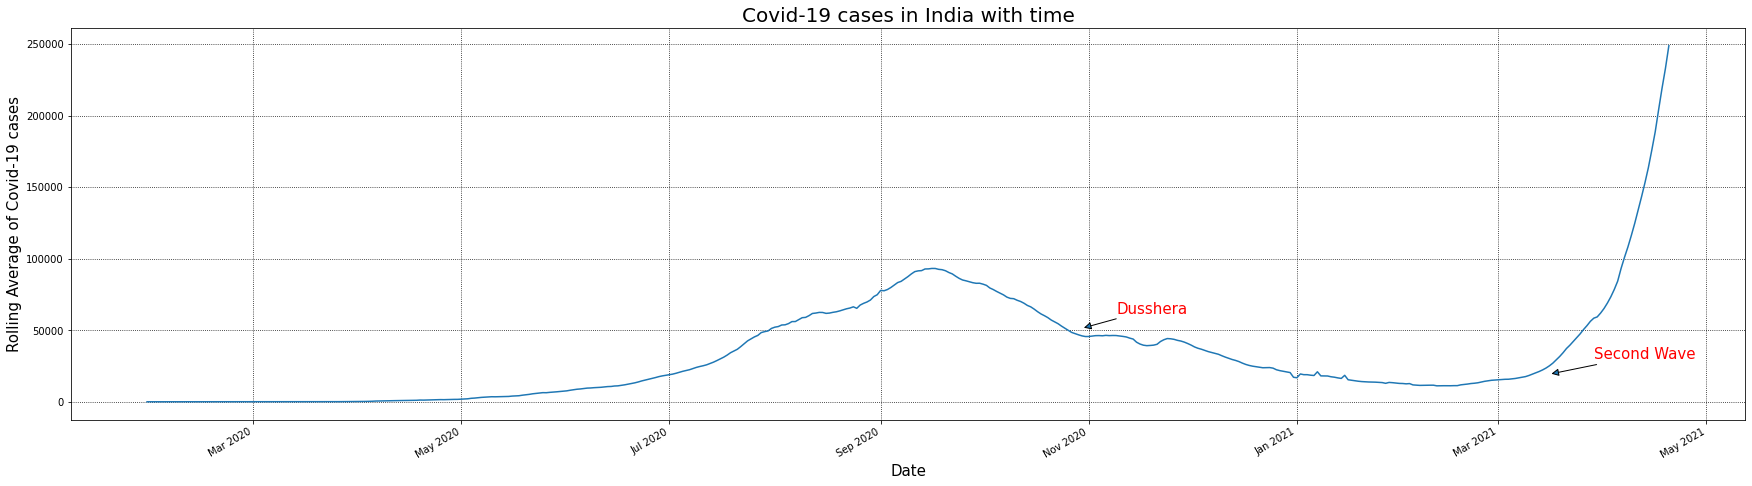

In [17]:
#using matplotlib to create a plot for India's data.
fig_1 = plt.figure(figsize=(30, 8))
ax_1 = fig_1.add_subplot()
ax_1.set_title('Covid-19 cases in India with time', fontsize=20)
ax_1.set_ylabel('Rolling Average of Covid-19 cases', fontsize=15)
ax_1.set_xlabel('Date', fontsize=15)
ax_1.plot(ind_date, ind_new_cases, linestyle= 'solid')
plt.gcf().autofmt_xdate()
date_format_1 = mpldates.DateFormatter("%b %Y")
plt.gca().xaxis.set_major_formatter(date_format_1)
plt.grid(True, color='k', linestyle=':')

#creating annotations for labeling points in the plot
ax_1.annotate('Dusshera', (mpldates.date2num(dt.datetime(2020, 10, 25)) + 5, ind_new_cases[ind_date.index(dt.datetime(2020, 10, 25))]), xytext = (35, 15), fontsize= 15, color  = 'red', textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax_1.annotate('Second Wave', (mpldates.date2num(dt.datetime(2021, 3, 11)) + 5, ind_new_cases[ind_date.index(dt.datetime(2021, 3, 11))]), xytext = (45,15), fontsize = 15, color = 'red', textcoords='offset points', arrowprops = dict(arrowstyle='-|>'))

plt.savefig('india.png')

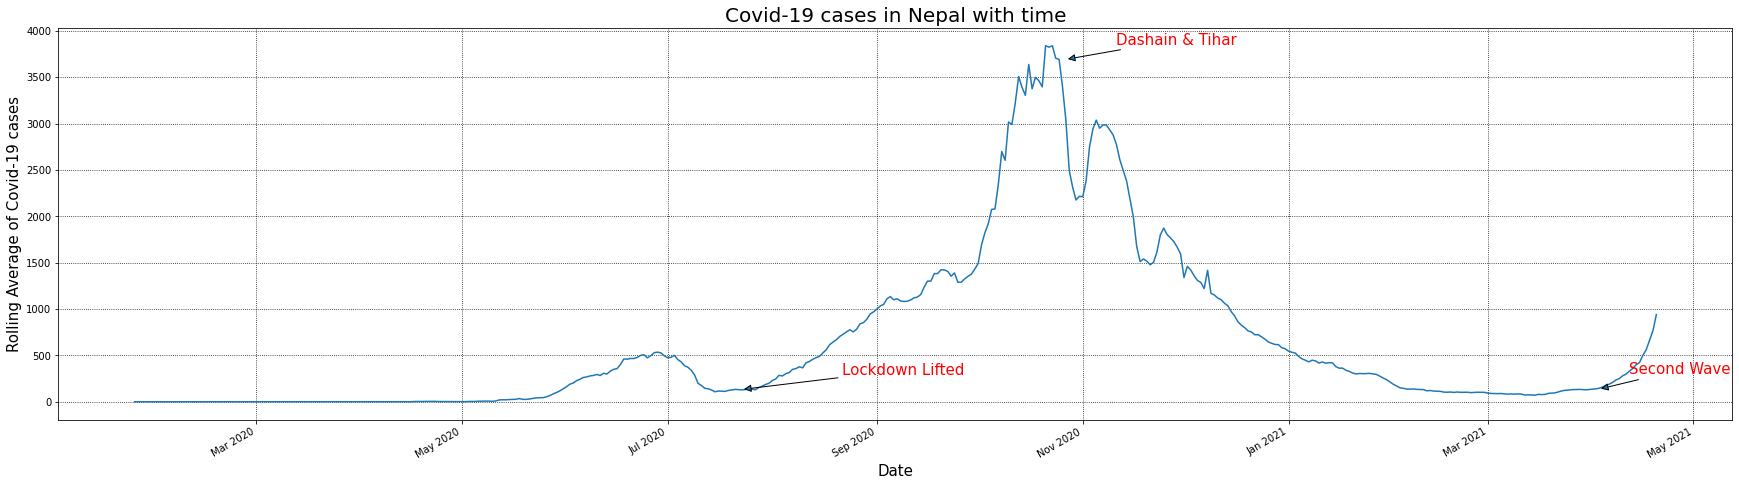

In [16]:
#using matplotlib to create a plot for Nepal's data.
fig_2 = plt.figure(figsize=(30,8))
ax_2 = fig_2.add_subplot()
ax_2.set_title('Covid-19 cases in Nepal with time', fontsize=20)
ax_2.set_xlabel('Date', fontsize=15)
ax_2.set_ylabel('Rolling Average of Covid-19 cases', fontsize=15)
ax_2.plot(nep_date, nep_new_cases, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format_2 = mpldates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format_2)
plt.grid(True, color='k', linestyle=':')

#creating annotations for labeling points in the plot
ax_2.annotate('Lockdown Lifted', (mpldates.date2num(dt.datetime(2020, 7, 21)) + 2, nep_new_cases[nep_date.index(dt.datetime(2020, 7, 21))]), xytext = (100, 15), fontsize= 15, color  = 'red', textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax_2.annotate('Dashain & Tihar', (mpldates.date2num(dt.datetime(2020, 10, 25)) + 2, nep_new_cases[nep_date.index(dt.datetime(2020, 10, 25))]), xytext = (50, 15), fontsize= 15, color  = 'red', textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax_2.annotate('Second Wave', (mpldates.date2num(dt.datetime(2021, 4, 1)) + 2, nep_new_cases[nep_date.index(dt.datetime(2021, 4, 1))]), xytext = (30, 15), fontsize= 15, color  = 'red', textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

plt.savefig('nepal.png')